## Treinamento do experimento da Ana (Formato de raízes).


In [1]:
!pip install tensorflow==2.7.0
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
pathRaiz='/content/drive/My Drive/GoogleColab/Ana'
os.chdir(pathRaiz)
os.getcwd()


Mounted at /content/drive


'/content/drive/My Drive/GoogleColab/Ana'

### Criando modelo (Resnet 50)




In [12]:
dim=224
TRAINING_DIR = "/content/drive/My Drive/GoogleColab/Ana/Formato/Treinamento"
train_datagen = ImageDataGenerator(rescale=1)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,class_mode = 'binary',
                                                    target_size=(dim, dim))

VALIDATION_DIR = "/content/drive/My Drive/GoogleColab/Ana/Formato/Validacao"
validation_datagen = ImageDataGenerator(rescale=1)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=32,class_mode = 'binary',
                                                              target_size=(dim, dim))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 4200 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


Epoch 1/100
132/132 [==============================] - 32s 215ms/step - loss: 0.6732 - acc: 0.6129 - val_loss: 0.6515 - val_acc: 0.6461
Epoch 2/100
132/132 [==============================] - 27s 204ms/step - loss: 0.6347 - acc: 0.6540 - val_loss: 0.6193 - val_acc: 0.6778
Epoch 3/100
132/132 [==============================] - 27s 201ms/step - loss: 0.6101 - acc: 0.6726 - val_loss: 0.5980 - val_acc: 0.6761
Epoch 4/100
132/132 [==============================] - 27s 203ms/step - loss: 0.5919 - acc: 0.6876 - val_loss: 0.5832 - val_acc: 0.7061
Epoch 5/100
132/132 [==============================] - 28s 212ms/step - loss: 0.5787 - acc: 0.6962 - val_loss: 0.5715 - val_acc: 0.7006
Epoch 6/100
132/132 [==============================] - 27s 202ms/step - loss: 0.5670 - acc: 0.7043 - val_loss: 0.5627 - val_acc: 0.7150
Epoch 7/100
132/132 [==============================] - 29s 221ms/step - loss: 0.5590 - acc: 0.7071 - val_loss: 0.5564 - val_acc: 0.7189
Epoch 8/100
132/132 [===========================

{'loss': [0.6732456088066101,
  0.6347430944442749,
  0.610054075717926,
  0.5919091105461121,
  0.5787138938903809,
  0.5670296549797058,
  0.5590105652809143,
  0.5516629219055176,
  0.5467702746391296,
  0.5405147671699524,
  0.5359187126159668,
  0.5325684547424316,
  0.5278400182723999,
  0.5248197317123413,
  0.5214870572090149,
  0.5174829959869385,
  0.5136706829071045,
  0.5115835666656494,
  0.5083208084106445,
  0.506683886051178,
  0.5045641660690308,
  0.5009965300559998,
  0.49875783920288086,
  0.4962656497955322,
  0.49405086040496826,
  0.492693156003952,
  0.48931822180747986,
  0.48811960220336914,
  0.4853333830833435,
  0.48331260681152344,
  0.4820890426635742,
  0.47947001457214355,
  0.4776184558868408,
  0.4764039218425751,
  0.47457200288772583,
  0.47201475501060486,
  0.47057822346687317,
  0.46875548362731934,
  0.466804563999176,
  0.46550899744033813,
  0.4631643295288086,
  0.46271219849586487,
  0.46004563570022583,
  0.45935946702957153,
  0.4580069482

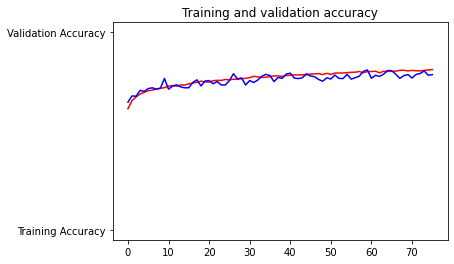

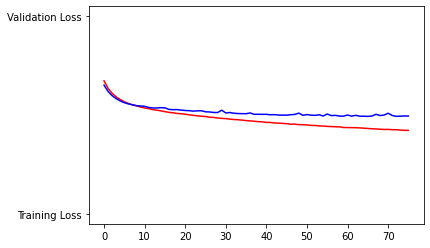

<Figure size 432x288 with 0 Axes>

In [14]:
import os
import warnings
from datetime import datetime
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
tf.random.set_seed(42)

####################
# 2. Base model
####################
base_model = tf.keras.applications.ResNet50(
    include_top=True,
    input_shape=(dim, dim, 3),
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000
)
for layer in base_model.layers:
    layer.trainable = False
    
####################
# 3. Custom layers
####################
x = tf.keras.layers.Flatten()(base_model.layers[-1].output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(
    inputs=base_model.inputs,
    outputs=out)



model.compile(loss='binary_crossentropy',  optimizer =RMSprop(lr=0.001),
              metrics=['acc'])







from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
time_start = datetime.now()
file_path2='/content/drive/My Drive/GoogleColab/Ana/Formato/weights/ResNet50_{epoch}.h5'
mchk=tf.keras.callbacks.ModelCheckpoint( filepath=file_path2,save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min',patience=10, verbose=1)
history = model.fit_generator(train_generator, epochs=100,callbacks=[mchk,es],
                    validation_data=validation_generator)
time_end = datetime.now()
print(f'Duration: {time_end - time_start}')


%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)




from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C1/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
 # print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1

print([c1,c2])


import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C2/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1
c1*100/(c1+c2)

print([c2,c1])

history.history



Epoch 1/100
132/132 [==============================] - 27s 197ms/step - loss: 0.6488 - acc: 0.6957 - val_loss: 0.6126 - val_acc: 0.7117
Epoch 2/100
132/132 [==============================] - 27s 201ms/step - loss: 0.5723 - acc: 0.7367 - val_loss: 0.5604 - val_acc: 0.7194
Epoch 3/100
132/132 [==============================] - 27s 205ms/step - loss: 0.5323 - acc: 0.7519 - val_loss: 0.5367 - val_acc: 0.7339
Epoch 4/100
132/132 [==============================] - 28s 209ms/step - loss: 0.5107 - acc: 0.7626 - val_loss: 0.5235 - val_acc: 0.7439
Epoch 5/100
132/132 [==============================] - 27s 206ms/step - loss: 0.4967 - acc: 0.7712 - val_loss: 0.5139 - val_acc: 0.7517
Epoch 6/100
132/132 [==============================] - 26s 196ms/step - loss: 0.4873 - acc: 0.7736 - val_loss: 0.5104 - val_acc: 0.7544
Epoch 7/100
132/132 [==============================] - 26s 196ms/step - loss: 0.4789 - acc: 0.7814 - val_loss: 0.5016 - val_acc: 0.7528
Epoch 8/100
132/132 [===========================

{'loss': [0.6487500667572021,
  0.5723472833633423,
  0.5323047041893005,
  0.5107367634773254,
  0.49665865302085876,
  0.4872799813747406,
  0.478943407535553,
  0.4734584093093872,
  0.4672887623310089,
  0.46231746673583984,
  0.4571901857852936,
  0.4520155191421509,
  0.4492568373680115,
  0.44477784633636475,
  0.44121822714805603,
  0.4382912218570709,
  0.43543848395347595,
  0.4318937361240387,
  0.42956849932670593,
  0.4272211492061615,
  0.4235077202320099,
  0.42136475443840027,
  0.41946542263031006,
  0.41683393716812134,
  0.4144895672798157,
  0.41169610619544983,
  0.410244345664978,
  0.40760305523872375,
  0.4043858051300049,
  0.40328073501586914,
  0.40118730068206787,
  0.39929309487342834,
  0.39791372418403625,
  0.3935297131538391,
  0.3932921290397644,
  0.3904731869697571,
  0.3882678151130676,
  0.3882039189338684,
  0.3848522901535034,
  0.3844105303287506,
  0.3831663727760315,
  0.381854772567749,
  0.37951284646987915,
  0.37827351689338684,
  0.377221

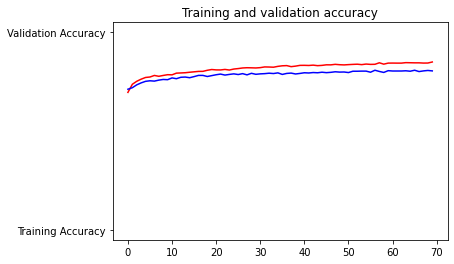

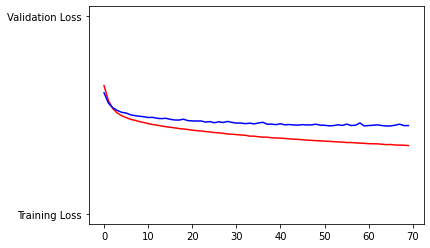

<Figure size 432x288 with 0 Axes>

In [15]:
import os
import warnings
from datetime import datetime
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
tf.random.set_seed(42)

####################
# 2. Base model
####################
base_model = tf.keras.applications.VGG16(
    include_top=True,
    input_shape=(dim, dim, 3),
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000
)
for layer in base_model.layers:
    layer.trainable = False
    
####################
# 3. Custom layers
####################
x = tf.keras.layers.Flatten()(base_model.layers[-1].output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(
    inputs=base_model.inputs,
    outputs=out)



model.compile(loss='binary_crossentropy',  optimizer =RMSprop(lr=0.001),
              metrics=['acc'])







from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
time_start = datetime.now()
file_path2='/content/drive/My Drive/GoogleColab/Ana/Formato/weights/VGG16_{epoch}.h5'
mchk=tf.keras.callbacks.ModelCheckpoint( filepath=file_path2,save_best_only=True)


es = EarlyStopping(monitor='val_loss', mode='min',patience=10, verbose=1)
history = model.fit_generator(train_generator, epochs=100,callbacks=[mchk,es],
                    validation_data=validation_generator)
time_end = datetime.now()
print(f'Duration: {time_end - time_start}')


%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)




from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C1/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
 # print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1

print([c1,c2])


import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C2/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1
c1*100/(c1+c2)


print([c2,c1])

history.history



Found 4200 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Epoch 1/100
132/132 [==============================] - 35s 226ms/step - loss: 0.6835 - acc: 0.5771 - val_loss: 0.6781 - val_acc: 0.5800
Epoch 2/100
132/132 [==============================] - 31s 234ms/step - loss: 0.6771 - acc: 0.5810 - val_loss: 0.6747 - val_acc: 0.5783
Epoch 3/100
132/132 [==============================] - 29s 217ms/step - loss: 0.6751 - acc: 0.5807 - val_loss: 0.6734 - val_acc: 0.5772
Epoch 4/100
132/132 [==============================] - 28s 212ms/step - loss: 0.6741 - acc: 0.5805 - val_loss: 0.6725 - val_acc: 0.5783
Epoch 5/100
132/132 [==============================] - 28s 213ms/step - loss: 0.6733 - acc: 0.5821 - val_loss: 0.6726 - val_acc: 0.5778
Epoch 6/100
132/132 [==============================] - 28s 215ms/step - loss: 0.6731 - acc: 0.5795 - val_loss: 0.6718 - val_acc: 0.5811
Epoch 7/100
132/132 [==============================] - 31s 237ms/step - loss: 0.6722 - acc: 0.5831 -

{'loss': [0.6834978461265564,
  0.6771432161331177,
  0.6750603318214417,
  0.6740555763244629,
  0.6733070611953735,
  0.6730954647064209,
  0.672195315361023,
  0.6718219518661499,
  0.671810507774353,
  0.6709209084510803,
  0.6717057228088379,
  0.6709480881690979,
  0.6703507304191589,
  0.6702740788459778,
  0.67038893699646,
  0.6698018312454224,
  0.6692987084388733,
  0.6694912314414978,
  0.6689159274101257,
  0.6694921255111694,
  0.6693214774131775,
  0.6690946221351624,
  0.6690860390663147,
  0.6692034602165222,
  0.668740451335907],
 'acc': [0.5771428346633911,
  0.5809524059295654,
  0.5807142853736877,
  0.5804761648178101,
  0.5821428298950195,
  0.5795238018035889,
  0.5830952525138855,
  0.5785714387893677,
  0.5830952525138855,
  0.5809524059295654,
  0.5802381038665771,
  0.5828571319580078,
  0.5842857360839844,
  0.5833333134651184,
  0.5809524059295654,
  0.5833333134651184,
  0.5816666483879089,
  0.5823809504508972,
  0.5835714340209961,
  0.5840476155281067,

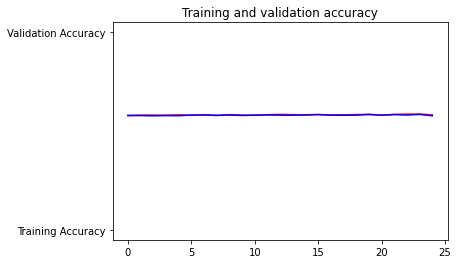

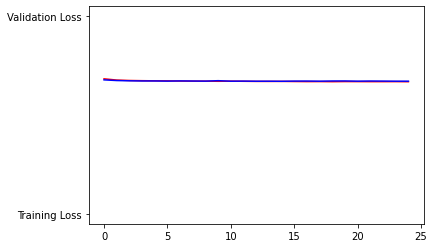

<Figure size 432x288 with 0 Axes>

In [17]:
dim=299
TRAINING_DIR = "/content/drive/My Drive/GoogleColab/Ana/Formato/Treinamento"
train_datagen = ImageDataGenerator(rescale=1)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,class_mode = 'binary',
                                                    target_size=(dim, dim))

VALIDATION_DIR = "/content/drive/My Drive/GoogleColab/Ana/Formato/Validacao"
validation_datagen = ImageDataGenerator(rescale=1)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=32,class_mode = 'binary',
                                                              target_size=(dim, dim))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.







import os
import warnings
from datetime import datetime
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
tf.random.set_seed(42)

####################
# 2. Base model
####################
base_model = tf.keras.applications.InceptionV3(
    include_top=True,
    input_shape=(dim, dim, 3),
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000
)
for layer in base_model.layers:
    layer.trainable = False
    
####################
# 3. Custom layers
####################
x = tf.keras.layers.Flatten()(base_model.layers[-1].output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(
    inputs=base_model.inputs,
    outputs=out)



model.compile(loss='binary_crossentropy',  optimizer =RMSprop(lr=0.001),
              metrics=['acc'])







from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
time_start = datetime.now()
file_path2='/content/drive/My Drive/GoogleColab/Ana/Formato/weights/InceptionV3_{epoch}.h5'
mchk=tf.keras.callbacks.ModelCheckpoint( filepath=file_path2,save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min',patience=10, verbose=1)
history = model.fit_generator(train_generator, epochs=100,callbacks=[es],
                    validation_data=validation_generator)
time_end = datetime.now()
print(f'Duration: {time_end - time_start}')


%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)




from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C1/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
 # print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1

print([c1,c2])


import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C2/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1
c1*100/(c1+c2)


print([c2,c1])

history.history



Found 4200 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
225222656/225209952 [==============================] - 9s 0us/step
Epoch 1/100
132/132 [==============================] - 77s 503ms/step - loss: 0.6938 - acc: 0.4926 - val_loss: 0.6928 - val_acc: 0.5067
Epoch 2/100
132/132 [==============================] - 62s 474ms/step - loss: 0.6936 - acc: 0.4940 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 3/100
132/132 [==============================] - 63s 474ms/step - loss: 0.6933 - acc: 0.5055 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 4/100
132/132 [==============================] - 63s 474ms/step - loss: 0.6933 - acc: 0.4931 - val_loss: 0.6924 - val_acc: 0.5256
Epoch 5/100
132/132 [==============================] - 63s 474ms/step - loss: 0.6935 - acc: 0.4983 - val_loss: 0.6926 - val_acc: 0.5006
Epoch 6/100
132/132 [==============================] - 63s 474ms/step - loss: 0.6934 - acc: 0.4990 - val_loss: 0.6926 - val_acc: 0.5006
Epoch 7/100
132/132 [============

{'loss': [0.6937934160232544,
  0.6935619115829468,
  0.6933326125144958,
  0.6933281421661377,
  0.6935427188873291,
  0.6933639049530029,
  0.6933597326278687,
  0.693323016166687,
  0.6933261156082153,
  0.6932305693626404,
  0.6927024722099304,
  0.6932793259620667,
  0.6930238604545593,
  0.6931562423706055,
  0.6927558183670044,
  0.6932417750358582,
  0.6930406093597412],
 'acc': [0.49261903762817383,
  0.494047611951828,
  0.505476176738739,
  0.4930952489376068,
  0.4983333349227905,
  0.4990476071834564,
  0.4995238184928894,
  0.5040476322174072,
  0.494047611951828,
  0.4954761862754822,
  0.506428599357605,
  0.49000000953674316,
  0.5047619342803955,
  0.49785715341567993,
  0.5116666555404663,
  0.49071428179740906,
  0.4985714256763458],
 'val_loss': [0.6928397417068481,
  0.6924128532409668,
  0.6934362649917603,
  0.6924275159835815,
  0.6925848126411438,
  0.6926136016845703,
  0.69240802526474,
  0.6934764981269836,
  0.6925562024116516,
  0.6930739283561707,
  0.69

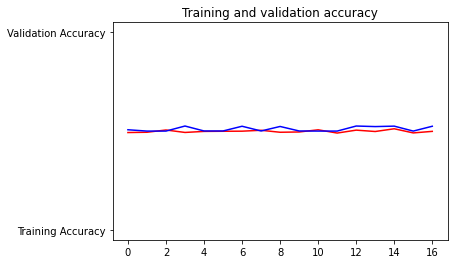

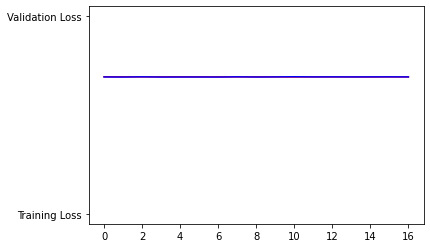

<Figure size 432x288 with 0 Axes>

In [21]:
dim=299
TRAINING_DIR = "/content/drive/My Drive/GoogleColab/Ana/Formato/Treinamento"
train_datagen = ImageDataGenerator(rescale=1)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,class_mode = 'binary',
                                                    target_size=(dim, dim))

VALIDATION_DIR = "/content/drive/My Drive/GoogleColab/Ana/Formato/Validacao"
validation_datagen = ImageDataGenerator(rescale=1)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=32,class_mode = 'binary',
                                                              target_size=(dim, dim))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.







import os
import warnings
from datetime import datetime
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
tf.random.set_seed(42)

####################
# 2. Base model
####################
base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(
    include_top=True,
    input_shape=(dim, dim, 3),
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000
)
for layer in base_model.layers:
    layer.trainable = False
    
####################
# 3. Custom layers
####################
x = tf.keras.layers.Flatten()(base_model.layers[-1].output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(
    inputs=base_model.inputs,
    outputs=out)



model.compile(loss='binary_crossentropy',  optimizer =RMSprop(lr=0.001),
              metrics=['acc'])







from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
time_start = datetime.now()
file_path2='/content/drive/My Drive/GoogleColab/Ana/Formato/weights/InceptionV3_{epoch}.h5'
mchk=tf.keras.callbacks.ModelCheckpoint( filepath=file_path2,save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min',patience=10, verbose=1)
history = model.fit_generator(train_generator, epochs=100,callbacks=[es],
                    validation_data=validation_generator)
time_end = datetime.now()
print(f'Duration: {time_end - time_start}')


%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)




from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C1/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
 # print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1

print([c1,c2])


import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C2/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1
c1*100/(c1+c2)


print([c2,c1])

history.history


Found 4200 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
50110464/50095040 [==============================] - 2s 0us/step
Epoch 1/100
132/132 [==============================] - 51s 311ms/step - loss: 0.6661 - acc: 0.6421 - val_loss: 0.6332 - val_acc: 0.6906
Epoch 2/100
132/132 [==============================] - 39s 294ms/step - loss: 0.6118 - acc: 0.6907 - val_loss: 0.5825 - val_acc: 0.7106
Epoch 3/100
132/132 [==============================] - 39s 298ms/step - loss: 0.5748 - acc: 0.7181 - val_loss: 0.5506 - val_acc: 0.7317
Epoch 4/100
132/132 [==============================] - 39s 296ms/step - loss: 0.5569 - acc: 0.7212 - val_loss: 0.5366 - val_acc: 0.7361
Epoch 5/100
132/132 [==============================] - 39s 296ms/step - loss: 0.5407 - acc: 0.7360 - val_loss: 0.5198 - val_acc: 0.7544
Epoch 6/100
132/132 [==============================] - 39s 297ms/step - loss: 0.5318 - acc: 0.7414 - val_loss: 0.5102 - val_acc: 0.7611
Epoch 7/100
132/132 [==============

{'loss': [0.6661134362220764,
  0.6117565631866455,
  0.5747995972633362,
  0.5568996667861938,
  0.5407432913780212,
  0.5317879915237427,
  0.5235599279403687,
  0.5187034606933594,
  0.5057743787765503,
  0.4996517598628998,
  0.49604034423828125,
  0.4994621276855469,
  0.4871668815612793,
  0.4863896667957306,
  0.47982197999954224,
  0.47552305459976196,
  0.4731632173061371,
  0.4672592580318451,
  0.46234485507011414,
  0.46828988194465637,
  0.45919105410575867,
  0.46348991990089417,
  0.4555891156196594,
  0.45343297719955444,
  0.4441818296909332,
  0.45207810401916504,
  0.4406028091907501,
  0.446002334356308,
  0.44198668003082275,
  0.4503634572029114,
  0.433243989944458,
  0.4384041428565979,
  0.44042566418647766,
  0.4277489185333252,
  0.4351799488067627,
  0.43075031042099,
  0.4214596152305603,
  0.42761021852493286,
  0.42778265476226807,
  0.4159780740737915,
  0.41996249556541443,
  0.4232043921947479,
  0.4261569380760193,
  0.41740882396698,
  0.421843320131

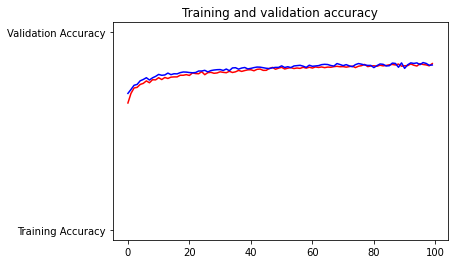

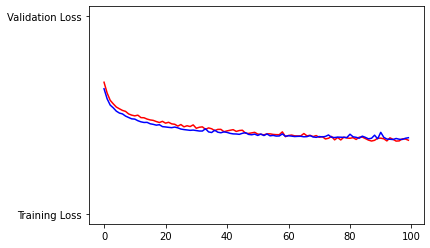

<Figure size 432x288 with 0 Axes>

In [23]:
dim=300
TRAINING_DIR = "/content/drive/My Drive/GoogleColab/Ana/Formato/Treinamento"
train_datagen = ImageDataGenerator(rescale=1)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,class_mode = 'binary',
                                                    target_size=(dim, dim))

VALIDATION_DIR = "/content/drive/My Drive/GoogleColab/Ana/Formato/Validacao"
validation_datagen = ImageDataGenerator(rescale=1)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=32,class_mode = 'binary',
                                                              target_size=(dim, dim))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.







import os
import warnings
from datetime import datetime
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
tf.random.set_seed(42)

####################
# 2. Base model
####################
base_model = tf.keras.applications.efficientnet.EfficientNetB3(
    include_top=True,
    input_shape=(dim, dim, 3),
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000
)
for layer in base_model.layers:
    layer.trainable = False
    
####################
# 3. Custom layers
####################
x = tf.keras.layers.Flatten()(base_model.layers[-1].output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(
    inputs=base_model.inputs,
    outputs=out)



model.compile(loss='binary_crossentropy',  optimizer =RMSprop(lr=0.001),
              metrics=['acc'])







from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
time_start = datetime.now()
file_path2='/content/drive/My Drive/GoogleColab/Ana/Formato/weights/InceptionV3_{epoch}.h5'
mchk=tf.keras.callbacks.ModelCheckpoint( filepath=file_path2,save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min',patience=10, verbose=1)
history = model.fit_generator(train_generator, epochs=100,callbacks=[es],
                    validation_data=validation_generator)
time_end = datetime.now()
print(f'Duration: {time_end - time_start}')


%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)




from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C1/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
 # print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1

print([c1,c2])


import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
source="/content/drive/My Drive/GoogleColab/Ana/Formato/Teste/C2/" 
nomes=os.listdir(source)
n=len(nomes)
c1=c2=0
for i in range(n):
  fn=nomes[i]
  path = source+ fn
  img = tf.keras.utils.load_img (path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #print(i*100/n)
  if classes[0]>0.5:
    c2=c2+1
  else:
   c1=c1+1
c1*100/(c1+c2)


print([c2,c1])

history.history
